<a href="https://colab.research.google.com/github/Mangalyze/Mangalyze_Model/blob/main/Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Predicted class: Gall Midge


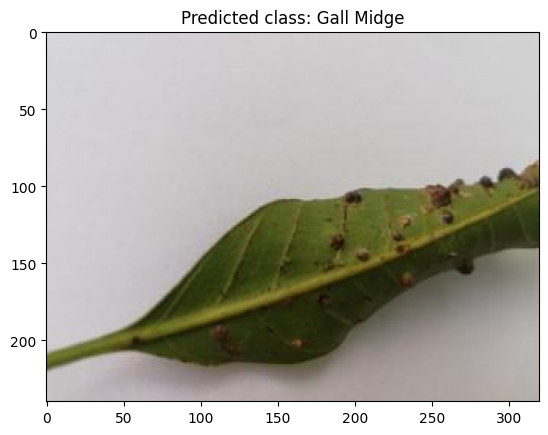

In [13]:
# Load the SavedModel
loaded_model = tf.saved_model.load('/content/drive/MyDrive/Capstone Mangalyze/Mangalyze 2/Model/saved_model/')

def preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    img_array = np.array(img) / 255.0
    # Change data type to float32
    img_array = img_array.astype(np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

image_path = '/content/drive/MyDrive/Capstone Mangalyze/Mangalyze 2/Data/test/Gall Midge/IMG_20211106_161442 (Custom).jpg'
preprocessed_image = preprocess_image(image_path)

# Perform inference
infer = loaded_model.signatures["serving_default"]
# Get the output layer's name from the model's outputs
output_layer_name = list(infer.structured_outputs.keys())[0]
predictions = infer(tf.constant(preprocessed_image))[output_layer_name]

# Get the predicted class
predicted_class = np.argmax(predictions)

# Define a dictionary to map class indices to class names
class_names = {
    0: 'Anthracnose',
    1: 'Bacterial Canker',
    2: 'Cutting Weevil',
    3: 'Die Back',
    4: 'Gall Midge',
    5: 'Healthy',
    6: 'Powdery Mildew',
    7: 'Sooty Mould'
}

# Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Print the predicted class name
print(f"Predicted class: {predicted_class_name}")

# Display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()

Saving Mango anthracnose.jpg to Mango anthracnose.jpg
Predicted class: Anthracnose


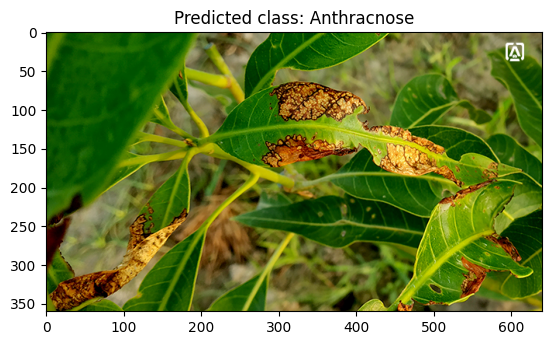

In [14]:
# Load the SavedModel
loaded_model = tf.saved_model.load('/content/drive/MyDrive/Capstone Mangalyze/Mangalyze 2/Model/saved_model/')

def preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    img_array = np.array(img) / 255.0
    # Change data type to float32
    img_array = img_array.astype(np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Upload image using files.upload()
from google.colab import files
uploaded = files.upload()

# Get the uploaded image path
image_path = list(uploaded.keys())[0]
preprocessed_image = preprocess_image(image_path)

# Perform inference
infer = loaded_model.signatures["serving_default"]
# Get the output layer's name from the model's outputs
output_layer_name = list(infer.structured_outputs.keys())[0]
predictions = infer(tf.constant(preprocessed_image))[output_layer_name]

# Get the predicted class
predicted_class = np.argmax(predictions)

# Define a dictionary to map class indices to class names
class_names = {
    0: 'Anthracnose',
    1: 'Bacterial Canker',
    2: 'Cutting Weevil',
    3: 'Die Back',
    4: 'Gall Midge',
    5: 'Healthy',
    6: 'Powdery Mildew',
    7: 'Sooty Mould'
}

# Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Print the predicted class name
print(f"Predicted class: {predicted_class_name}")

# Display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.title(f"Predicted class: {predicted_class_name}")
plt.show()